In [ ]:
!pip install mip

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sys import stdout as out
from mip import Model, xsum, minimize, BINARY, INTEGER

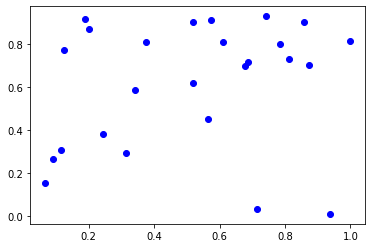

In [ ]:
points = np.random.rand(25,2)


for p in points:
  plt.plot(p[0],p[1],'bo')

In [ ]:
dist_matrix = [[np.linalg.norm(np.array(p1)-np.array(p2)) for p1 in points] for p2 in points]

In [ ]:
n = len(points)
V = set(range(len(points)))

In [ ]:
model = Model()

In [ ]:
x = [[model.add_var(var_type=BINARY) for j in V] for i in V]
y = [model.add_var(var_type=INTEGER,lb=1,ub=n-1) for i in V] 

In [ ]:
model.objective = minimize(xsum(dist_matrix[i][j]*x[i][j] for i in V for j in V))

In [ ]:
for i in V:
  model += xsum(x[i][j] for j in V - {i}) == 1 

for j in V:
  model += xsum(x[i][j] for i in V - {j}) == 1 

for (i, j) in product(V - {0}, V - {0}):
  if i!=j:
    model += y[i] - y[j] + (n+1)*x[i][j] <= n


In [ ]:
model.optimize()

<OptimizationStatus.OPTIMAL: 0>

In [ ]:
for row in x:
  vals = [e.x for e in row]
  print(vals)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

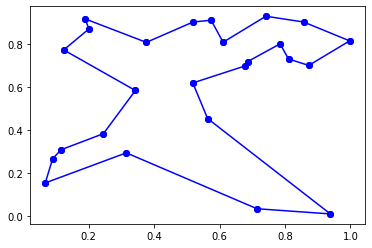

In [ ]:
for i in range(len(x)):
  for j in range(len(x)):
    if x[i][j].x == 1:
      plt.plot([points[i][0],points[j][0]],[points[i][1],points[j][1]],'bo-')